## Packages and definition of parameters

In [8]:
# --- packages --- #
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, glob
import matplotlib.colors as colors
from scipy.stats import binned_statistic_2d
pd.set_option("display.max_columns", None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from ctapipe.instrument import SubarrayDescription

# --- path to all scripts --- #
sys.path.insert(0, '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/scripts')
import auxiliar as aux
import geometry as geom
# graphic parameters
aux.params()

# --- LaPalma map importing --- #
# reading map images
mapZoom  = plt.imread('/fefs/aswg/workspace/juan.jimenez/stereo_analysis/config_files/images/map1.png')


# --- paths --- #
dir_mask = '/fefs/aswg/LST1MAGIC/mc/DL2/ST0316A/NSB1.5/GammaTest/v01.2/dec_2276/*.h5'
event_coinc_dir   = '/fefs/aswg/workspace/juan.jimenez/data/dl1/joint_runs_magic_lst'

dir_stereo_reco   = '/fefs/aswg/workspace/juan.jimenez/data/dl2/stereo_merged_Crab'
dir_stereo_reco2   = '/fefs/aswg/workspace/juan.jimenez/data/dl2/stereo_mean'

name_stereo_3T    = 'dl2_mean_Crab_total.3tel'
name_stereo_total = 'dl2_LST-1_MAGIC.Run02918_to_07282'

dl1_example_file  = '/fefs/aswg/workspace/juan.jimenez/data/dl1/stereo_subruns/Run02923/dl1_stereo_LST-1_MAGIC.Run02923.0038.h5'

# text for labeling telescopes
tel_lab = ['LST-1', 'M-1', 'M-2'] 
lst_diameter   = 23 # m
magic_diameter = 17 # m



map_xsize, map_ysize = 11.3, 6.9
map_xlims = (-244, 224)
map_ylims = (-147, 204)
xlims = (-100, 100)
ylims = (-70, 70)

kw_txt = dict(ha='center', va='center')

In [2]:
# --- reading the data --- #
df    = pd.read_hdf(os.path.join(dir_stereo_reco, f'{name_stereo_total}.h5'), key='/events/parameters')
df_3T = pd.read_hdf(os.path.join(dir_stereo_reco2, f'{name_stereo_3T   }.h5'))

###########################################
# --- telescopes positions extraction --- #
###########################################

tel_positions = SubarrayDescription.from_hdf(dl1_example_file).positions

coord_t1, coord_t2, coord_t3 = [tel_positions[tel_index].value for tel_index in [1, 2, 3]]

xpos = np.array([tel_positions[i].value[0] for i in [1, 2, 3]])
ypos = np.array([tel_positions[i].value[1] for i in [1, 2, 3]])
zpos = np.array([tel_positions[i].value[2] for i in [1, 2, 3]])

# applying a 90 degree rotation to set the north in the y direction
xpos, ypos = ypos, xpos
xpos = xpos * (-1)

coord_t1 = [xpos[0], ypos[0], zpos[0]]
coord_t2 = [xpos[1], ypos[1], zpos[1]]
coord_t3 = [xpos[2], ypos[2], zpos[2]]

print(f'\nExtracting telescopes positions:')
print(f'LST-1   coords:  [{xpos[0]:.2f}, {ypos[0]:.2f}, {zpos[0]:.2f}] m')
print(f'MAGIC-1 coords:  [{xpos[1]:.2f}, {ypos[1]:.2f}, {zpos[1]:.2f}] m')
print(f'MAGIC-2 coords:  [{xpos[2]:.2f}, {ypos[2]:.2f}, {zpos[2]:.2f}] m')

###########################################

###############################################
# --- changing the coordinates to y-north --- #
###############################################
df['core_x'], df['core_y'] = df['core_y'], df['core_x']
df['core_x'] = df['core_x'].to_numpy() * (-1)

df['pointing_zd'] = 90 - np.rad2deg(df['pointing_alt'])
df['pointing_eq_angle'] = - np.rad2deg(df['pointing_az']) + 90
df['pointing_alt'] = np.rad2deg(df['pointing_alt'])
df['pointing_az'] = np.rad2deg(df['pointing_az'])

df['zd'] = 90 - df['alt']
df['eq_angle'] = - df['az'] +90
###############################################

print(f'Stereo total dataframe:')
display(df.head(5))
print(f'3-Tel dataframe:')
display(df_3T.head(5))


Extracting telescopes positions:
LST-1   coords:  [-77.13, -8.09, 0.78] m
MAGIC-1 coords:  [62.55, 39.30, -0.97] m
MAGIC-2 coords:  [14.57, -31.21, 0.20] m
Stereo total dataframe:


,obs_id,event_id,tel_id,obs_id_magic,event_id_magic,obs_id_lst,event_id_lst,intensity,x,y,r,phi,length,length_uncertainty,width,width_uncertainty,psi,skewness,kurtosis,slope,intercept,intensity_width_1,intensity_width_2,pixels_width_1,pixels_width_2,n_pixels,n_islands,pointing_alt,pointing_az,timestamp,time_diff,multiplicity,combo_type,alt,alt_uncert,az,az_uncert,core_x,core_y,impact,h_max,reco_energy,reco_energy_var,reco_disp,reco_disp_var,reco_alt,reco_az,disp_diff_sum,disp_diff_mean,gammaness,gammaness_var,pointing_zd,pointing_eq_angle,zd,eq_angle
0,2918,4275857,1,5093151,2058,2918.0,4275857.0,141.289196,0.111838,0.315187,0.334441,70.463810,0.030138,0.002521,0.026636,0.002883,-80.822090,-0.167787,1.944122,-204.326584,21.994013,0.000000,0.000000,0.000000,0.000000,7,1,54.968137,268.267818,1.605677e+09,0.000224,2,1,55.324524,0.0,268.010873,0.0,-31.827332,-203.576065,199.398373,16430.373628,0.088010,0.101529,0.630956,0.265138,55.297604,268.306587,0.173550,0.173550,0.554500,0.247030,35.031863,-178.267818,34.675476,-178.010873
1,2918,4275857,2,5093151,2058,2918.0,4275857.0,164.062500,0.203824,0.213030,0.294832,46.265086,0.035727,0.001650,0.025987,0.000951,70.980048,0.393400,2.399730,-3.130265,12.010548,0.000000,0.000000,0.000000,0.000000,15,1,54.964806,268.266534,1.605677e+09,3.272558,2,1,55.324524,0.0,268.010873,0.0,-31.827332,-203.576065,253.743182,16430.373628,0.200275,0.016701,0.558838,0.020108,55.423641,268.516485,0.173550,0.173550,0.820167,0.147493,35.035194,-178.266534,34.675476,-178.010873
2,2918,4275866,1,5093151,2059,2918.0,4275866.0,1819.687607,-0.392010,-0.550935,0.676167,-125.433177,0.364132,0.012115,0.210793,0.005827,60.244051,1.187021,2.924134,7.702372,15.251962,0.002930,0.021501,0.000539,0.002695,107,5,54.968132,268.267822,1.605677e+09,0.000641,2,1,54.734722,0.0,268.038643,0.0,-46.850505,37.380579,51.222540,1261.283586,0.586446,0.305145,1.464224,0.362258,54.892556,268.517795,0.373214,0.373214,0.015000,0.014775,35.031868,-178.267822,35.265278,-178.038643
3,2918,4275866,2,5093151,2059,2918.0,4275866.0,90.921875,-0.308676,-0.038144,0.311024,-172.955427,0.131916,0.003510,0.011216,0.000926,-0.894755,-0.359149,1.257552,-12.005372,16.604581,0.155353,0.367417,0.001925,0.003850,10,2,54.964802,268.266537,1.605677e+09,0.001402,2,1,54.734722,0.0,268.038643,0.0,-46.850505,37.380579,88.784202,1261.283586,1.678247,0.899116,1.143314,0.287506,55.136634,268.025371,0.373214,0.373214,0.097833,0.088262,35.035198,-178.266537,35.265278,-178.038643
4,2918,4275878,1,5093151,2060,2918.0,4275878.0,30535.399517,-0.223821,-0.028971,0.225688,-172.624719,0.429615,0.003026,0.111171,0.001780,70.989958,-0.714882,2.447401,-2.454321,25.060401,0.013399,0.033178,0.005391,0.012399,306,8,54.968116,268.267834,1.605677e+09,0.000082,2,1,54.782923,0.0,269.573404,0.0,-97.726169,-62.902869,57.424589,5550.554492,9.056898,0.181015,1.099976,0.115623,54.856530,269.971705,0.864333,0.864333,0.085667,0.078328,35.031884,-178.267834,35.217077,-179.573404


3-Tel dataframe:


combo_type  multiplicity     timestamp  pointing_alt  \
obs_id event_id                                                         
2918   4275942            3             3  1.605677e+09      0.959334   
       4276028            3             3  1.605677e+09      0.959333   
       4276074            3             3  1.605677e+09      0.959333   
       4276114            3             3  1.605677e+09      0.959332   
       4276176            3             3  1.605677e+09      0.959331   

                 pointing_az  reco_energy   reco_alt     reco_az  gammaness  \
obs_id event_id                                                               
2918   4275942      4.682144     0.796588  55.165463  269.484415   0.007064   
       4276028      4.682145     1.410887  57.071117  267.256345   0.166668   
       4276074      4.682145     1.012915  54.113229  265.527577   0.344855   
       4276114      4.682146     0.386003  55.221119  268.492019   0.007761   
       4276176      4.682146    11.774663  54.805154  271.502583   0.020673   

                 pointing_ra  pointing_dec    reco_ra   reco_dec      total_id  
obs_id event_id                                                                 
2918   4275942     83.992910     22.245216  83.959618  22.969694  2918.4275942  
       4276028     83.992909     22.245219  86.344030  22.391758  2918.4276028  
       4276074     83.992909     22.245220  83.718954  20.459911  2918.4276074  
       4276114     83.992908     22.245221  84.209651  22.449238  2918.4276114  
       4276176     83.992908     22.245223  83.210532  23.968903  2918.4276176

## Defining the variables

In [3]:
# order by combo type
c0 = df.query(f'combo_type == 0 & tel_id == 2')
c1 = df.query(f'combo_type == 1 & tel_id == 1')
c2 = df.query(f'combo_type == 2 & tel_id == 1')

c3 = df.query(  f'combo_type == 3', inplace=False).query(f'tel_id == 1')
c3_2 = df.query(f'combo_type == 3', inplace=False).query(f'tel_id == 2')
c3_3 = df.query(f'combo_type == 3', inplace=False).query(f'tel_id == 3')

# recalculating impact parameter
cores_set = [c3['core_x'], c3['core_y'], np.zeros(len(c3))]
dirs_set  = [c3['zd'], c3['eq_angle']]
c3['recal_impact'] = geom.line_point_distance(*cores_set, *dirs_set, coord_t1)
c3['error_recal_impact'] = np.array(c3['recal_impact'] - c3['impact'])
df = c3.copy()



# --- extracting variables from dataframes --- #
# for telescopes
xc0, yc0 = c0['core_x'], c0['core_y']
xc1, yc1 = c1['core_x'], c1['core_y']
xc2, yc2 = c2['core_x'], c2['core_y']
xc3, yc3 = c3['core_x'], c3['core_y']

# filtering smalles amount of data
dreduced = c3[20000:65000]
xq, yq = dreduced['core_x'], dreduced['core_y']

# # extracting impact parameter
iq1 = dreduced['impact']
iq2 = c3_2[20000:65000]['impact']
iq3 = c3_3[20000:65000]['impact']

# Plotting on a map general

In [4]:
# creating a folder to save the plots
pltpath = 'plots/'
if not os.path.exists(pltpath):
    os.makedirs(pltpath)
dpi      = 200     # resolution of saved images
formatIm = '.png'  # format of saved images

t  = df_3T['timestamp'].to_numpy()
dt = np.diff(t)
obs_time = sum(dt[dt<1])

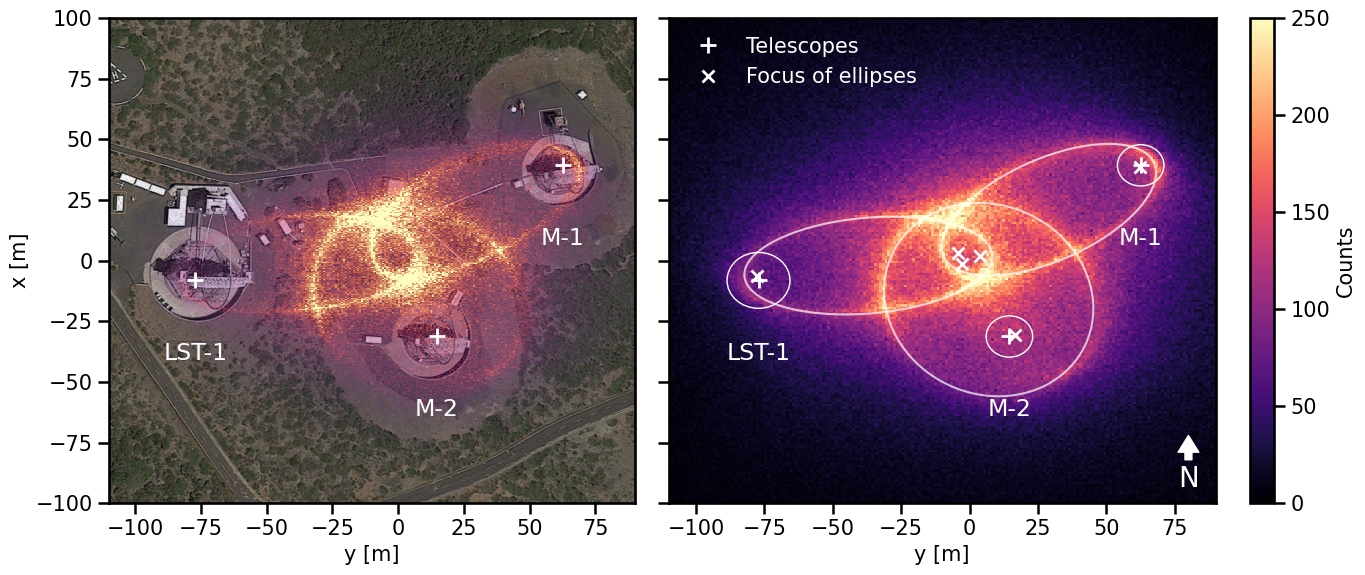

In [9]:
xlims = (-110, 90)
ylims = (-100, 100)


fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1, 1.3]}, sharey=True)

##########################################
# --- telescope positions and labels --- #
##########################################
for ax in [ax1, ax2]:
    ax.plot(xpos, ypos, '+', color='w', ms=12, label='Telescopes')
    for i in range(len(xpos)):
        ax.text(xpos[i], ypos[i]-30, tel_lab[i], c='w', fontsize=17, **kw_txt)
    
circleLST1 = plt.Circle((xpos[0], ypos[0]), lst_diameter/2,   fill=False, color='w', zorder=10)
circleM1   = plt.Circle((xpos[1], ypos[1]), magic_diameter/2, fill=False, color='w', zorder=10)
circleM2   = plt.Circle((xpos[2], ypos[2]), magic_diameter/2, fill=False, color='w', zorder=10)
ax1.add_patch(circleLST1)
ax1.add_patch(circleM1)
ax1.add_patch(circleM2)
##########################################

# plotting ellipses
u, v, a, b, t_rot = 7, -16, 41, 37, 2.15
geom.plot_ellipse(u, v, a, b, t_rot, ax1, lw=1.5, alpha=0.7)
f1 = geom.focus_points([u, v], a, b, t_rot)
ax1.plot(f1[0], f1[1], 'x', color='w', ms=8,)

u, v, a, b, t_rot = 29, 21, 43, 20.5, 0.49
geom.plot_ellipse(u, v, a, b, t_rot, ax1, lw=1.5, alpha=0.7)
f2 = geom.focus_points([u, v], a, b, t_rot)
ax1.plot(f2[0], f2[1], 'x', color='w', ms=8,)

u, v, a, b, t_rot = -37, -2, 45.5, 19.7, 0.101
geom.plot_ellipse(u, v, a, b, t_rot, ax1, lw=1.5, alpha=0.7)
f3 = geom.focus_points([u, v], a, b, t_rot)
ax1.plot(f3[0], f3[1], 'x', color='w', ms=8, label='Focus of ellipses',)

###############
# --- map --- #
ax2.imshow(mapZoom, extent=[*map_xlims, *map_ylims], aspect='auto', alpha=1)
###############

#############################
# --- overlap histogram --- #
#############################
cmap = aux.transparent_cmap('magma')

_, _, _, im = ax2.hist2d(xc3, yc3, bins=400, cmap=cmap, range=([-150, 150], [-105, 100]), vmax=90)
# fig.colorbar(im, ax=ax2, label='counts')
#############################


#####################
# --- histogram --- #
#####################
_, _, _, im = ax1.hist2d(xc3, yc3, bins=200, range=[xlims, ylims], cmap='magma', vmax=250)
fig.colorbar(im, ax=ax1, label='Counts')
#####################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .14, .05, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax1.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax1.transAxes, **kw, **kw_txt)
ax1.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax1.transAxes, **kw_txt)
#######################

ax1.legend(loc=2, frameon=False, labelcolor='w')

for ax in [ax1, ax2]:
    ax.set_xlim(*xlims)
    ax.set_ylim(*ylims)
    ax.set_xlabel('y [m]')
ax2.set_ylabel('x [m]')

fig.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()

plt.savefig(f'{pltpath}reconstructed-positions-artifact.png', bbox_inches='tight', dpi=dpi)
plt.show()

### Other `non-3T` telescope event distributions

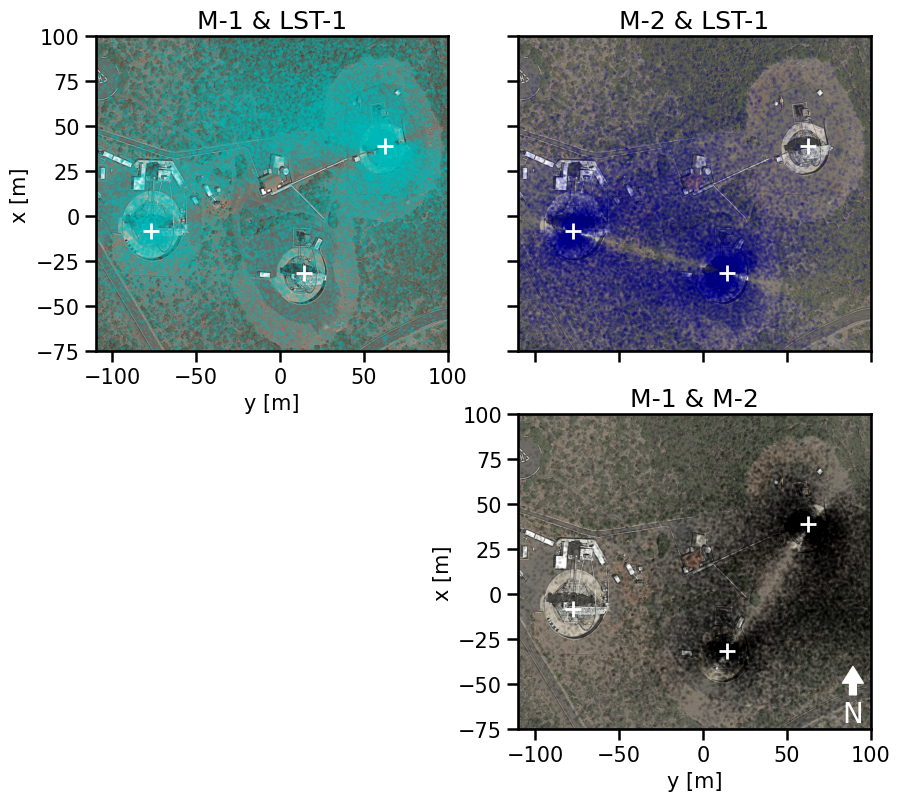

In [7]:
fig, ((ax1, ax2), (ax4, ax3)) = plt.subplots(2, 2, figsize=(10, 9),)
ax1.set_title('M-1 & LST-1')
ax2.set_title('M-2 & LST-1')
ax3.set_title('M-1 & M-2')

##########################################
# --- telescope positions and labels --- #
##########################################
for ax in [ax1, ax2, ax3]:
    ax.imshow(mapZoom, extent=[*map_xlims, *map_ylims], aspect='auto', alpha=0.85)
    for i in range(len(xpos)):
        ax.plot(xpos[i], ypos[i], '+', color='w', ms=12)
##########################################

########################
# --- scatter plot --- #
########################
ax1.scatter(xc1[:80000], yc1[:80000], c='c',     marker='o', alpha=0.12, s=2, )
ax2.scatter(xc2[:80000], yc2[:80000], c='darkblue', marker='o', alpha=0.07, s=2, )
ax3.scatter(xc0[:80000], yc0[:80000], c='k',          marker='o', alpha=0.07, s=2, )
########################

#######################
# --- north arrow --- #
#######################
xa, ya, arrow_length, kw = .95, .2, .09, dict(arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'))
ax3.annotate('', xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', xycoords=ax.transAxes, **kw, **kw_txt)
ax3.text(xa, 1 - xa, 'N', color='w', fontsize=20, transform=ax.transAxes, **kw_txt)
#######################

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(*[-110, 100])
    ax.set_ylim(*[-75, 100])
ax1.set_xlabel('y [m]')
ax3.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')
ax3.set_ylabel('x [m]')

fig.delaxes(ax4)
ax2.set_xticklabels([])
ax2.set_yticklabels([])


plt.savefig(f'{pltpath}reconstructed-positions-non3tel-events.png', bbox_inches='tight', dpi=dpi)
plt.show()